In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import soundfile
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
from merge_datasets import merge_datasets

all_datasets = merge_datasets(bangla=True,english_tess=False)
all_datasets

7000 Bangla DATA Loaded
                                              speech     label  corpus gender
0      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav     angry  Bangla      f
1      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_2.wav     angry  Bangla      f
2      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_3.wav     angry  Bangla      f
3      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_4.wav     angry  Bangla      f
4      ./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_5.wav     angry  Bangla      f
...                                              ...       ...     ...    ...
6995  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_1.wav  surprise  Bangla      m
6996  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_2.wav  surprise  Bangla      m
6997  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_3.wav  surprise  Bangla      m
6998  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_4.wav  surprise  Bangla      m
6999  ./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_5.wav  surprise  Bangla      m

[7000 rows x 4 columns]
7000 Bangla DAT

,speech,label,corpus,gender
0,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav,angry,Bangla,f
1,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_2.wav,angry,Bangla,f
2,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_3.wav,angry,Bangla,f
3,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_4.wav,angry,Bangla,f
4,./SUBESCO/SUBESCO\F_01_OISHI_S_10_ANGRY_5.wav,angry,Bangla,f
...,...,...,...,...
6995,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_1.wav,surprise,Bangla,m
6996,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_2.wav,surprise,Bangla,m
6997,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_3.wav,surprise,Bangla,m
6998,./SUBESCO/SUBESCO\M_10_EVAN_S_9_SURPRISE_4.wav,surprise,Bangla,m


<AxesSubplot:xlabel='gender', ylabel='count'>

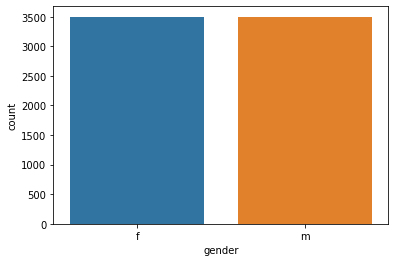

In [5]:

df = all_datasets[['speech','gender']]
# df = df[df['label'] != 'disgust']

sns.countplot(df['gender'])


In [6]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time',y_axis='hz')
    plt.colorbar()
    

## Sample sound

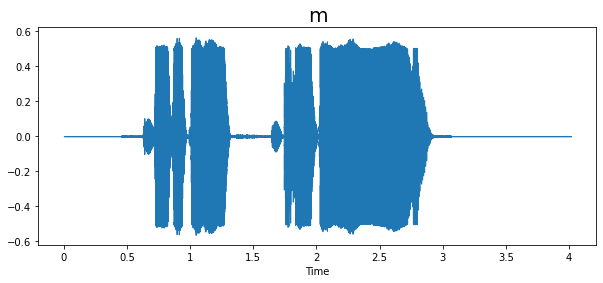

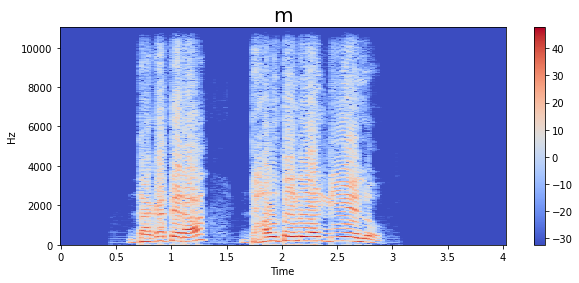

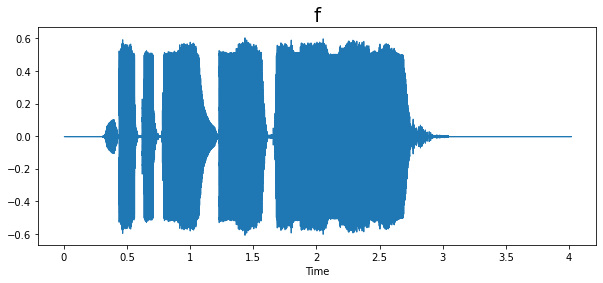

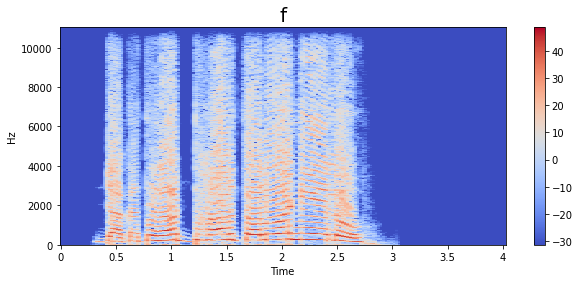

In [10]:
emotions = ['m','f']

for emotion in emotions:
    path = df['speech'][df['gender'] == emotion]
    data, sampling_rate=librosa.load(path.iloc[1])
    waveplot(data, sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
Audio(path.iloc[1])

In [190]:
# audio_path1 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_ANGRY_1.wav"
# audio_path2 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_SAD_1.wav"
# audio_path3 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_NEUTRAL_1.wav"
# audio_path4 = "./SUBESCO/SUBESCO/M_02_NIPUN_S_7_FEAR_1.wav"
# audio_paths = [audio_path1,audio_path2,audio_path3,audio_path4]
# for audio_path in audio_paths:
#     y, sr = librosa.load(audio_path)
#     zcr = librosa.feature.zero_crossing_rate(y).max()
#     print(zcr)
# sr

## Feature Extraction

In [11]:
def extract_mfcc(filename):
    y ,sr = librosa.load(filename, duration=5, offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


    
def extract_features(file_name, mfcc, chroma, mel):
#     waveplot(data, sampling_rate,emotion)
#     spectogram(data,sampling_rate,emotion)
    y ,sr = librosa.load(file_name, duration=5, offset=0.5)
    result=np.array([])
    if(mfcc):
        mfccs =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
        result=np.hstack((result, mfccs))
    if(chroma):
        stft=np.abs(librosa.stft(y))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
    return result

extract_features("./SUBESCO/SUBESCO/M_02_NIPUN_S_7_HAPPY_4.wav", mfcc=True, chroma=False, mel=True)


array([-2.75552643e+02,  4.65493393e+01, -8.36749268e+00,  3.31653237e+00,
        2.71597672e+00, -2.33601928e+00, -7.58835971e-01,  2.03626251e+00,
       -8.16794872e+00,  3.42244363e+00, -3.93527865e+00, -9.61693406e-01,
       -6.83697510e+00,  2.73409337e-01, -1.79368126e+00, -3.16153264e+00,
       -7.58333874e+00, -4.02367055e-01, -4.41908741e+00, -3.85672712e+00,
       -5.15536499e+00,  1.55432975e+00, -4.83747482e+00,  8.20999563e-01,
        8.95678461e-01,  1.84846091e+00,  7.34253585e-01,  3.63311529e+00,
        1.19640732e+00,  2.58513188e+00, -7.92549193e-01,  2.61559439e+00,
       -1.02020085e+00,  8.65532339e-01, -8.63765299e-01,  1.40068853e+00,
       -4.75807250e-01,  1.90824008e+00,  3.91647846e-01, -8.31300691e-02,
        3.32015038e+00,  4.39589882e+00,  8.43927193e+00,  8.90456104e+00,
        8.19682407e+00,  1.22556906e+01,  3.52051544e+01,  6.71266479e+01,
        8.80803070e+01,  1.01225716e+02,  6.69326706e+01,  2.29099331e+01,
        5.12008476e+00,  

## Extract mfcc 

In [13]:
X_mfcc = df['speech'].apply(lambda x: extract_features(x, mfcc=True, chroma=False, mel=False))


In [14]:
X_mfcc

0       [-197.97003173828125, 53.9019775390625, -7.473...
1       [-198.5157470703125, 47.22080612182617, -7.357...
2       [-188.63711547851562, 48.893062591552734, -5.5...
3       [-249.9854278564453, 42.0660400390625, -5.9486...
4       [-210.64389038085938, 60.59241485595703, -8.43...
                              ...                        
6995    [-304.8660888671875, 48.33720016479492, 10.471...
6996    [-321.1960754394531, 42.83946990966797, 4.2667...
6997    [-324.7000732421875, 46.463836669921875, 6.269...
6998    [-306.1288146972656, 49.42455291748047, 6.7340...
6999    [-293.4005126953125, 50.33232498168945, 4.0614...
Name: speech, Length: 7000, dtype: object

## Expand dimension

In [15]:
X = [ x for x in X_mfcc]

X= np.array(X)

print(X_mfcc.shape)
print(X_mfcc[0])
print(X.shape)
print(X[0])


(7000,)
[-1.97970032e+02  5.39019775e+01 -7.47349930e+00  1.54062595e+01
 -1.64477658e+00  6.70004368e-01 -5.09518337e+00 -2.41899991e+00
 -6.94994211e+00  1.66377449e+00 -4.45638943e+00 -1.83087826e+00
 -2.63091826e+00  7.52181411e-01 -3.87786865e+00 -1.84587598e+00
 -3.07073021e+00 -7.91006207e-01 -3.81855321e+00  7.40493655e-01
 -6.76647246e-01  2.83525729e+00  2.72117305e+00  8.32362747e+00
  3.06120205e+00  5.90772438e+00  1.62555230e+00  2.93098593e+00
  6.70543194e-01  2.71701884e+00  8.51229578e-03  3.99384356e+00
  5.54161489e-01  3.15907979e+00 -1.70438421e+00 -5.74910343e-01
 -1.78887022e+00  8.05806398e-01 -1.05784154e+00  8.99862409e-01]
(7000, 40)
[-1.97970032e+02  5.39019775e+01 -7.47349930e+00  1.54062595e+01
 -1.64477658e+00  6.70004368e-01 -5.09518337e+00 -2.41899991e+00
 -6.94994211e+00  1.66377449e+00 -4.45638943e+00 -1.83087826e+00
 -2.63091826e+00  7.52181411e-01 -3.87786865e+00 -1.84587598e+00
 -3.07073021e+00 -7.91006207e-01 -3.81855321e+00  7.40493655e-01
 -6.7

In [16]:

X=np.expand_dims(X, -1)
print(X.shape)
print(X[0])

(7000, 40, 1)
[[-1.97970032e+02]
 [ 5.39019775e+01]
 [-7.47349930e+00]
 [ 1.54062595e+01]
 [-1.64477658e+00]
 [ 6.70004368e-01]
 [-5.09518337e+00]
 [-2.41899991e+00]
 [-6.94994211e+00]
 [ 1.66377449e+00]
 [-4.45638943e+00]
 [-1.83087826e+00]
 [-2.63091826e+00]
 [ 7.52181411e-01]
 [-3.87786865e+00]
 [-1.84587598e+00]
 [-3.07073021e+00]
 [-7.91006207e-01]
 [-3.81855321e+00]
 [ 7.40493655e-01]
 [-6.76647246e-01]
 [ 2.83525729e+00]
 [ 2.72117305e+00]
 [ 8.32362747e+00]
 [ 3.06120205e+00]
 [ 5.90772438e+00]
 [ 1.62555230e+00]
 [ 2.93098593e+00]
 [ 6.70543194e-01]
 [ 2.71701884e+00]
 [ 8.51229578e-03]
 [ 3.99384356e+00]
 [ 5.54161489e-01]
 [ 3.15907979e+00]
 [-1.70438421e+00]
 [-5.74910343e-01]
 [-1.78887022e+00]
 [ 8.05806398e-01]
 [-1.05784154e+00]
 [ 8.99862409e-01]]


In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

y = enc.fit_transform(df[['gender']])

print(y.shape)
y
enc.categories_[0]

(7000, 2)


array(['f', 'm'], dtype=object)

In [19]:
y = y.toarray()
print(y.shape)
y

(7000, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## LSTM MODEL

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Conv1D,MaxPooling1D

In [32]:
unq = len(df['gender'].unique())
model = Sequential([
    Conv1D(filters=256, kernel_size=5, padding='same', activation='relu',input_shape=(40, 1)),
    MaxPooling1D(pool_size=4),
    LSTM(8),
    Dense(unq, activation='softmax'),
])


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 40, 256)           1536      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 8)                 8480      
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 10,034
Trainable params: 10,034
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [33]:
# y = np.asarray(y).astype(np.float32)
# X = np.asarray(X).astype(np.float32)
# print(y)


from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle= True)
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_valid, y_valid))


Epoch 1/100
74/74 [==============================] - 6s 26ms/step - loss: 0.5162 - accuracy: 0.7644 - val_loss: 0.4918 - val_accuracy: 0.7580
Epoch 2/100
74/74 [==============================] - 1s 15ms/step - loss: 0.3684 - accuracy: 0.8484 - val_loss: 0.3399 - val_accuracy: 0.8589
Epoch 3/100
74/74 [==============================] - 1s 17ms/step - loss: 0.3019 - accuracy: 0.8742 - val_loss: 0.2529 - val_accuracy: 0.9030
Epoch 4/100
74/74 [==============================] - 1s 16ms/step - loss: 0.2637 - accuracy: 0.8938 - val_loss: 0.2982 - val_accuracy: 0.8766
Epoch 5/100
74/74 [==============================] - 1s 15ms/step - loss: 0.2333 - accuracy: 0.9098 - val_loss: 0.2283 - val_accuracy: 0.9061
Epoch 6/100
74/74 [==============================] - 1s 17ms/step - loss: 0.2318 - accuracy: 0.9064 - val_loss: 0.1747 - val_accuracy: 0.9407
Epoch 7/100
74/74 [==============================] - 1s 18ms/step - loss: 0.2120 - accuracy: 0.9179 - val_loss: 0.3432 - val_accuracy: 0.8554
Epoch 

74/74 [==============================] - 2s 21ms/step - loss: 0.0551 - accuracy: 0.9791 - val_loss: 0.1226 - val_accuracy: 0.9563
Epoch 59/100
74/74 [==============================] - 2s 21ms/step - loss: 0.0547 - accuracy: 0.9814 - val_loss: 0.0547 - val_accuracy: 0.9818
Epoch 60/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0521 - accuracy: 0.9802 - val_loss: 0.0601 - val_accuracy: 0.9788
Epoch 61/100
74/74 [==============================] - 2s 22ms/step - loss: 0.0457 - accuracy: 0.9838 - val_loss: 0.0711 - val_accuracy: 0.9736
Epoch 62/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0458 - accuracy: 0.9838 - val_loss: 0.0731 - val_accuracy: 0.9758
Epoch 63/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0504 - accuracy: 0.9814 - val_loss: 0.0625 - val_accuracy: 0.9805
Epoch 64/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0475 - accuracy: 0.9814 - val_loss: 0.0621 - val_accuracy: 0.9784
Epoch 65/100

## Plot the result

In [34]:
Y_pred = model.predict(X)

np.argmax(Y_pred)

y_pred_labels = [np.argmax(i) for i in Y_pred]
y_real_labels = [np.argmax(i) for i in y]


In [35]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_real_labels,predictions=y_pred_labels)

Text(69.0, 0.5, 'Truth')

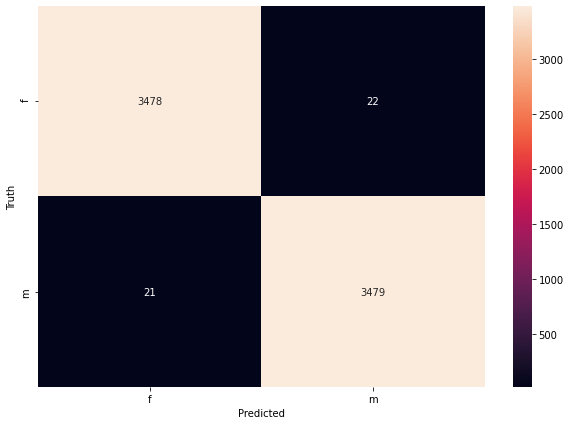

In [36]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True,fmt='d',xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [186]:
import pickle

In [37]:

model.save("gender_mfcc.h5")

In [38]:
# from tensorflow import keras
# loaded_model = keras.models.load_model('./models/only_bangla__mfcc.h5')
# loaded_model.summary()


In [165]:
Y_pred = model.predict(x_valid)

Text(69.0, 0.5, 'Truth')

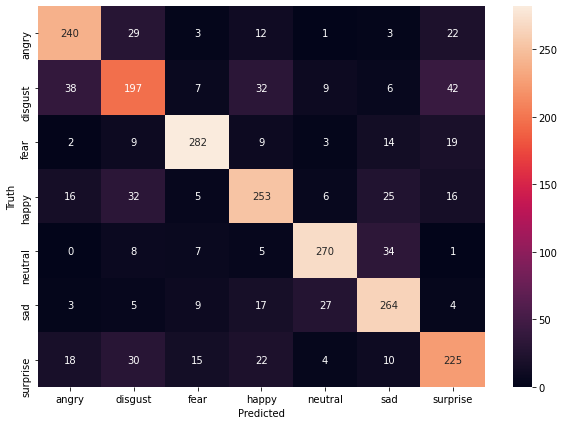

In [166]:


y_pred_labels = [np.argmax(i) for i in Y_pred]
y_real_labels = [np.argmax(i) for i in y_valid]
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_real_labels,predictions=y_pred_labels)
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True,fmt='d',xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
model.evaluate(x_valid, y_valid)

73/73 [==============================] - 1s 12ms/step - loss: 1.4024 - accuracy: 0.7494


[1.4023654460906982, 0.7493506669998169]

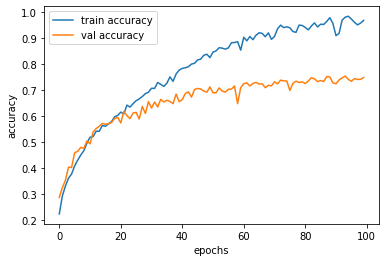

In [171]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

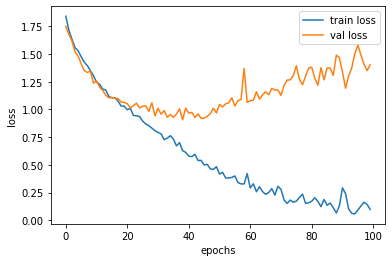

In [172]:
epochs = list(range(100))
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(epochs, acc, label='train loss')
plt.plot(epochs, val_acc, label='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [44]:
model.layers[0]

In [50]:
model.layers[2].output

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'lstm_2')>